In [1]:
%matplotlib inline

import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

## Example of distribution of p-values from pathway enrichment

Multiple optimal solutions enumerated by each enumeration method were used to perform pathway enrichment as downstream analysis. Distribution of the p-values can be plotted for each cell line/method

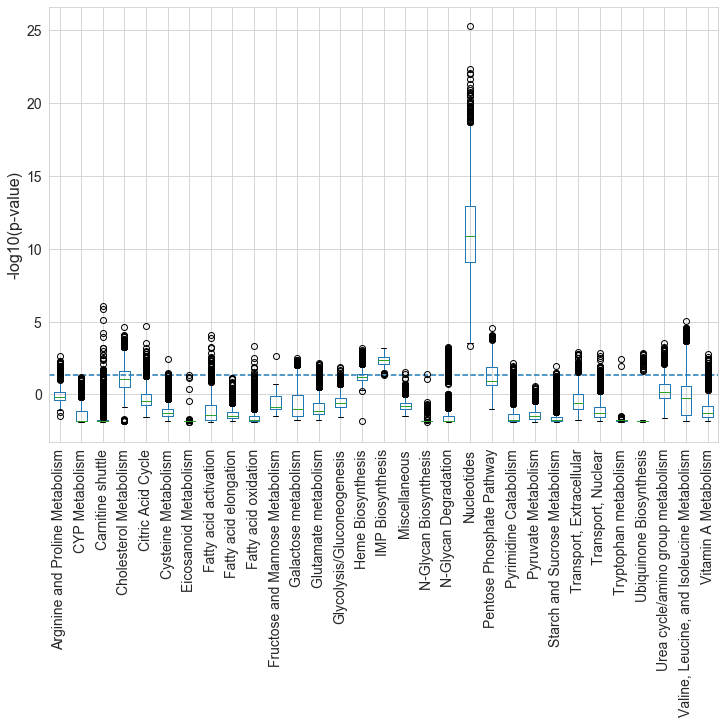

In [2]:
def load_csv(csvfile):
    return pd.read_csv(csvfile, sep=';').dropna().rename(columns={'Var1': 'pathway'}).set_index('pathway')

def plot(csvfile, figsize=(16,6)):
    df = load_csv(csvfile)
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_ylabel('-log10(p-value)', fontsize=16)
    ax.axhline(-np.log10(0.05), linestyle='--')
    df.T.boxplot(ax=ax, rot=90, fontsize=14)
    
plot('./results/cancer/csv/enrichment/K562_10_90__diversity_log_pval.csv.zip', figsize=(12,8))

## Comparing enrichment distributions between methods

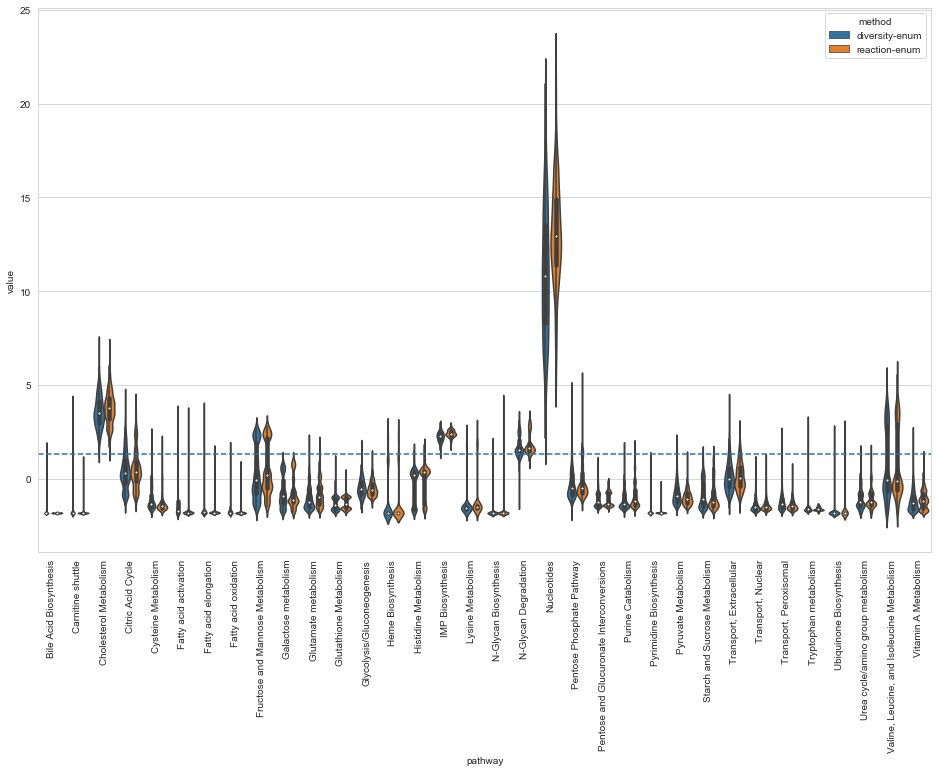

In [3]:
df1 = load_csv('./results/cancer/csv/enrichment/A375_10_90__diversity_log_pval.csv.zip').T
df2 = load_csv('./results/cancer/csv/enrichment/A375_10_90__icut_log_pval.csv.zip').T
df1t = df1.melt()
df2t = df2.melt()

df1t['method'] = 'diversity-enum'
df2t['method'] = 'reaction-enum'

dff = pd.concat([df1t, df2t])

fig, ax = plt.subplots(figsize=(16,10))
sns.violinplot(x='pathway', y='value', hue='method', data=dff, ax=ax)
ax.axhline(-np.log10(0.05), linestyle='--')
plt.xticks(rotation=90);

## Comparing lowest p-values detected by each method

In [4]:
df_maxp = pd.read_csv('./results/cancer/csv/enrichment/A375_10_90_max_logpval.csv.zip', sep=';').dropna().set_index('pathway').clip(0, 100)
df_maxp = df_maxp.rename(columns={'max_dexom':'Diversity-enum', 'max_rxnenum':'Reaction-enum', 'max_icut':'Icut-enum', 'max_maxdist':'Maxdist-enum'})

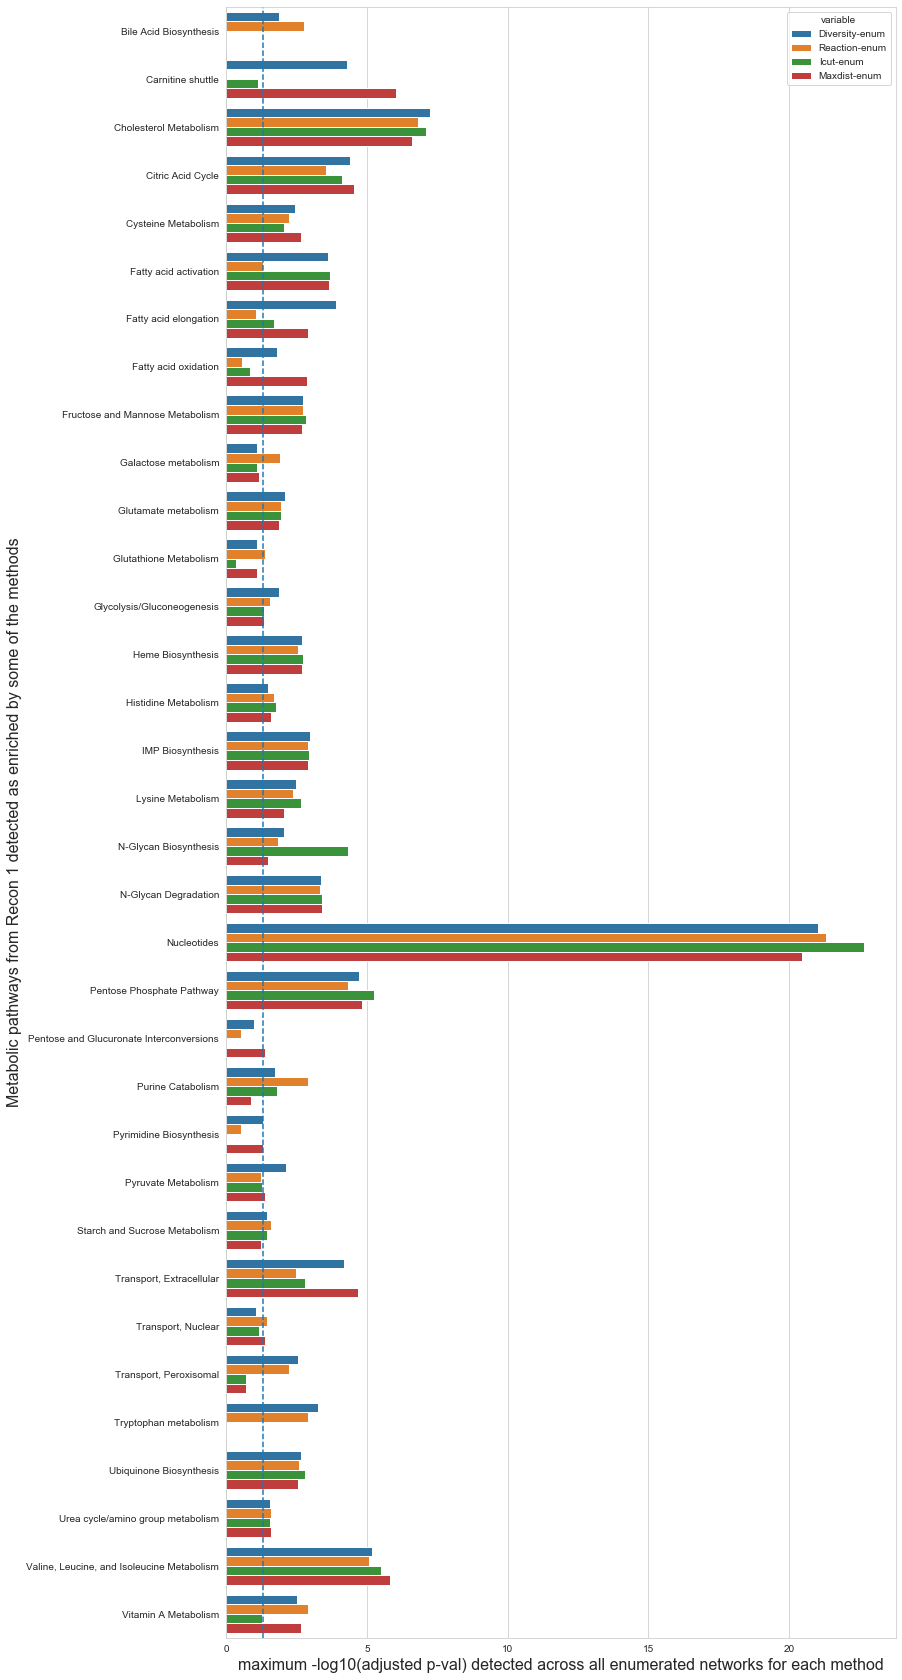

In [5]:
fig, ax = plt.subplots(figsize=(12,30))
sns.barplot(x='value', y='pathway', hue='variable', data=df_maxp.melt(ignore_index=False).reset_index(), ax=ax)
ax.axvline(-np.log10(0.05), linestyle='--')
ax.set_xlabel('maximum -log10(adjusted p-val) detected across all enumerated networks for each method', fontsize=16);
ax.set_ylabel('Metabolic pathways from Recon 1 detected as enriched by some of the methods', fontsize=16);

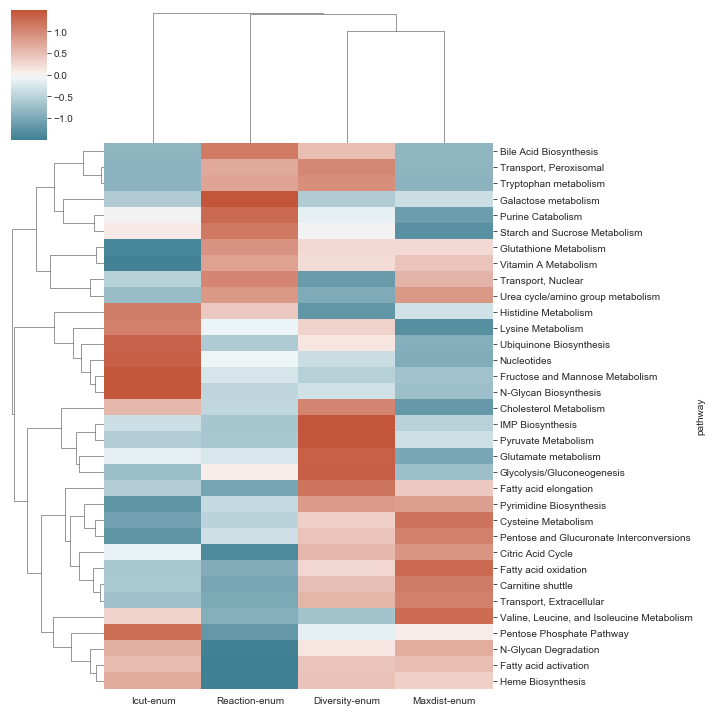

In [6]:
sns.clustermap(df_maxp, z_score=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Clustering of enriched pathways (alpha = 0.05)


In [7]:
def plot_heatmap_enrichment(path="./results/cancer/csv/enrichment/", cell="A375", figsize=(12,10), threshold=[10, 90], save=False):
    file = path + cell + f"_{threshold[0]}_{threshold[1]}_proportion_enriched.csv.zip"
    print(file)
    df_proportion = pd.read_csv(file, sep=';').dropna().set_index('pathways').rename(
    columns={'p_dexom': 'Diversity-enum', 
             'p_rxnenum': 'Reaction-enum', 
             'p_icut': 'Icut-enum', 
             'p_maxdist': 'Maxdist-enum'})
    df_p = df_proportion.copy()
    df_p[df_p > 0] = 1
    sns.set(font_scale=1.4)
    g = sns.clustermap(df_p, cmap=['#dcd9e2', '#3b1366'], figsize=figsize, col_cluster=False, row_cluster=True)
    g.cax.set_visible(False)
    g.fig.suptitle(f"Pathways detected as enriched (by any optimal network)\n Cell line {cell} (thresholds {threshold[0]/100:.2f}, {threshold[1]/100:.2f})") 
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90);
    if save:
        plt.tight_layout()
        plt.savefig(f"{cell}_{threshold[0]}_{threshold[1]}_enrichment.pdf")

./results/cancer/csv/enrichment/A375_10_90_proportion_enriched.csv.zip


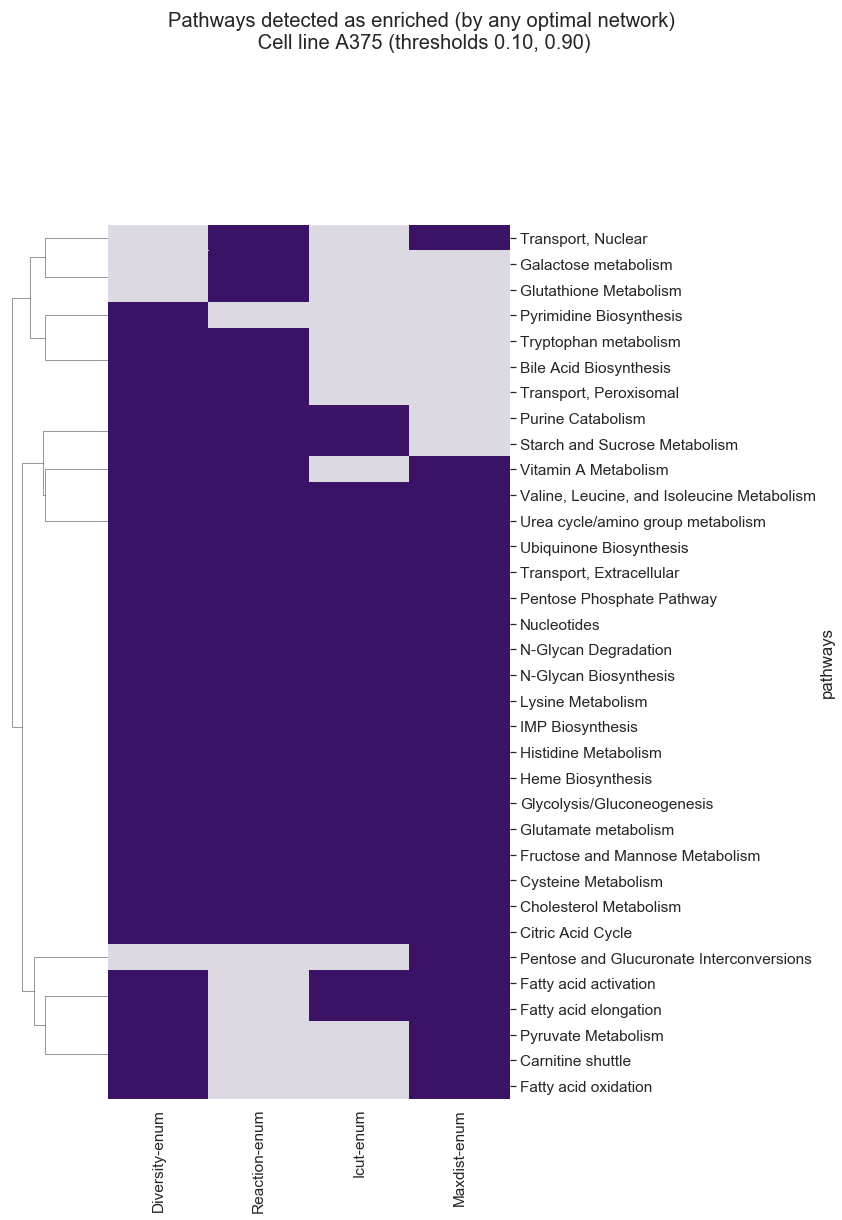

In [8]:
plot_heatmap_enrichment(cell="A375", threshold=[10, 90], figsize=(12,16))

./results/cancer/csv/enrichment/A375_25_75_proportion_enriched.csv.zip


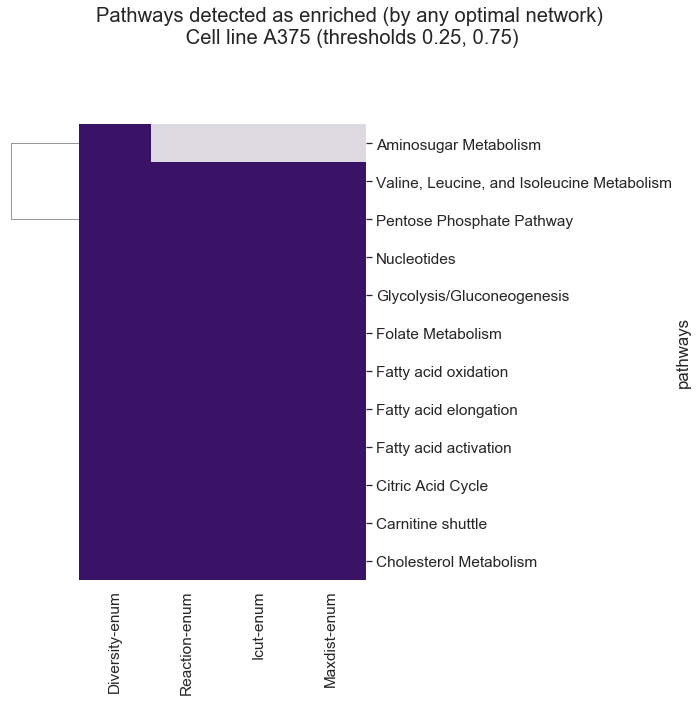

In [9]:
plot_heatmap_enrichment(cell="A375", threshold=[25, 75], figsize=(10,10))

./results/cancer/csv/enrichment/HL60_10_90_proportion_enriched.csv.zip


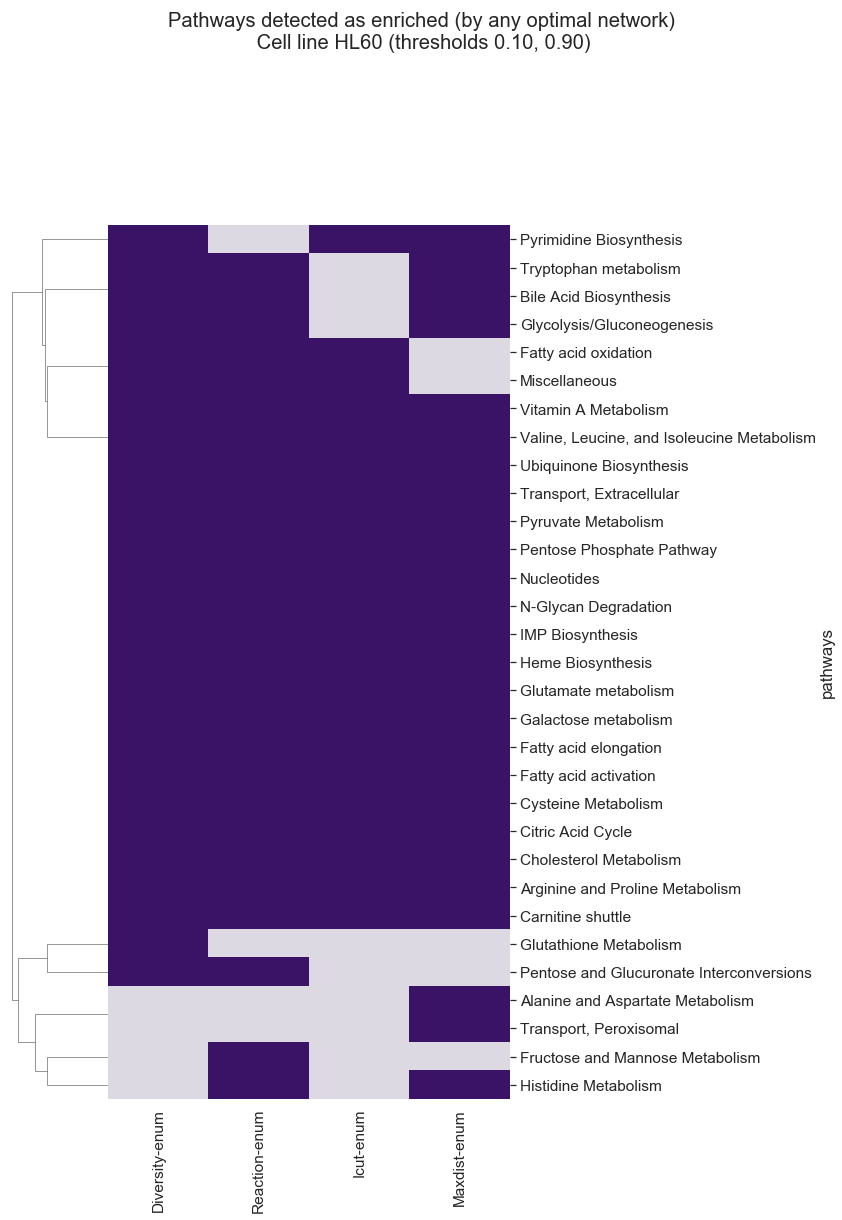

In [10]:
plot_heatmap_enrichment(cell="HL60", threshold=[10, 90], figsize=(12,16))

./results/cancer/csv/enrichment/HL60_25_75_proportion_enriched.csv.zip


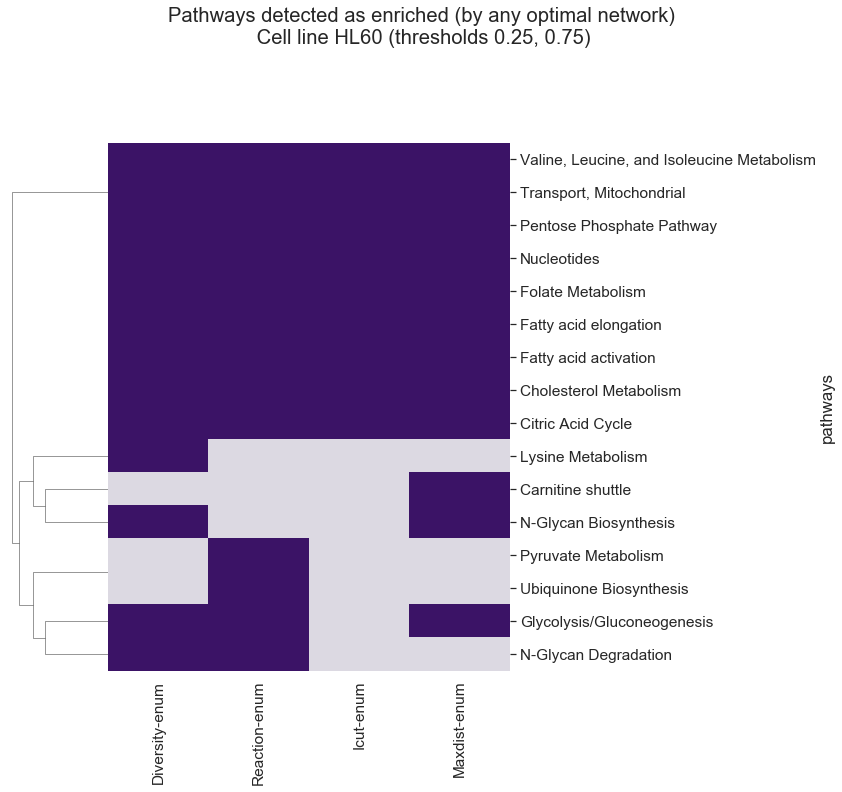

In [11]:
plot_heatmap_enrichment(cell="HL60", threshold=[25, 75])

./results/cancer/csv/enrichment/KBM7_10_90_proportion_enriched.csv.zip


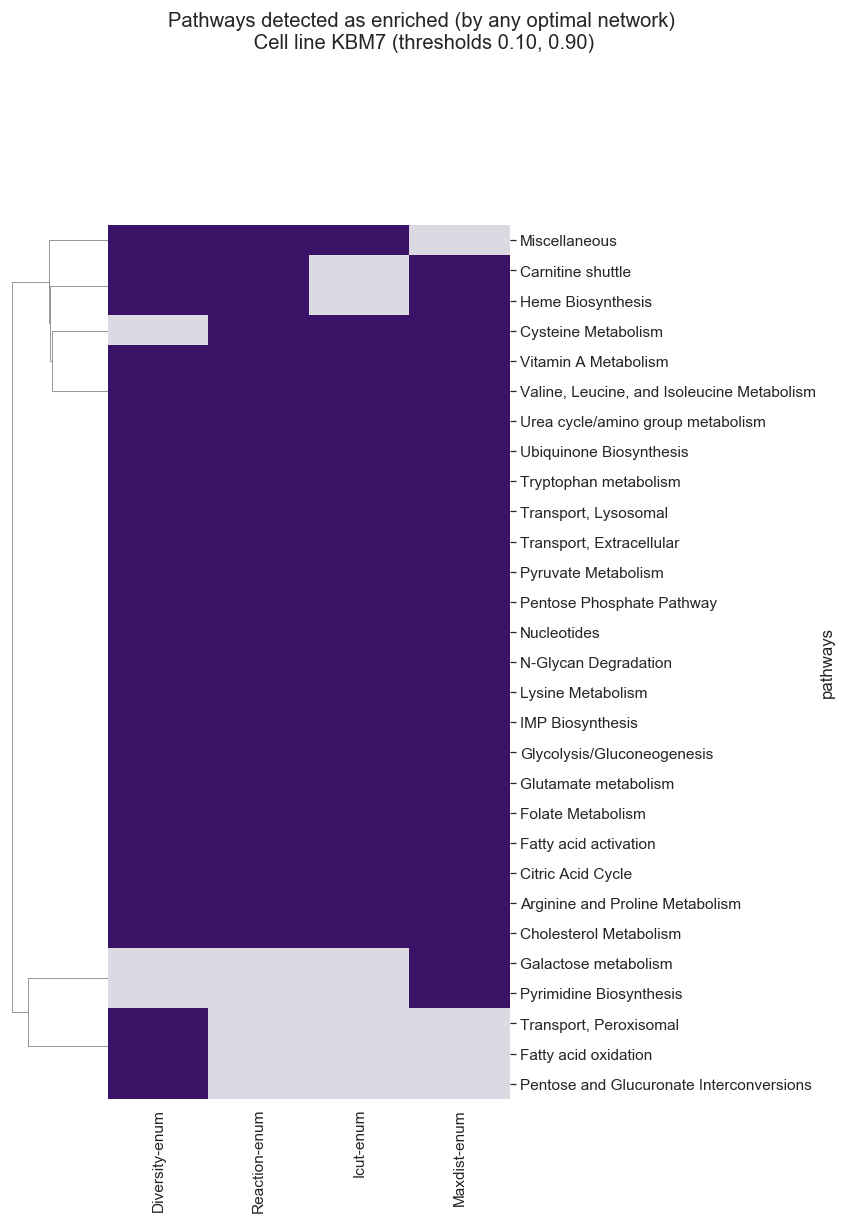

In [12]:
plot_heatmap_enrichment(cell="KBM7", threshold=[10, 90], figsize=(12,16))

./results/cancer/csv/enrichment/KBM7_25_75_proportion_enriched.csv.zip


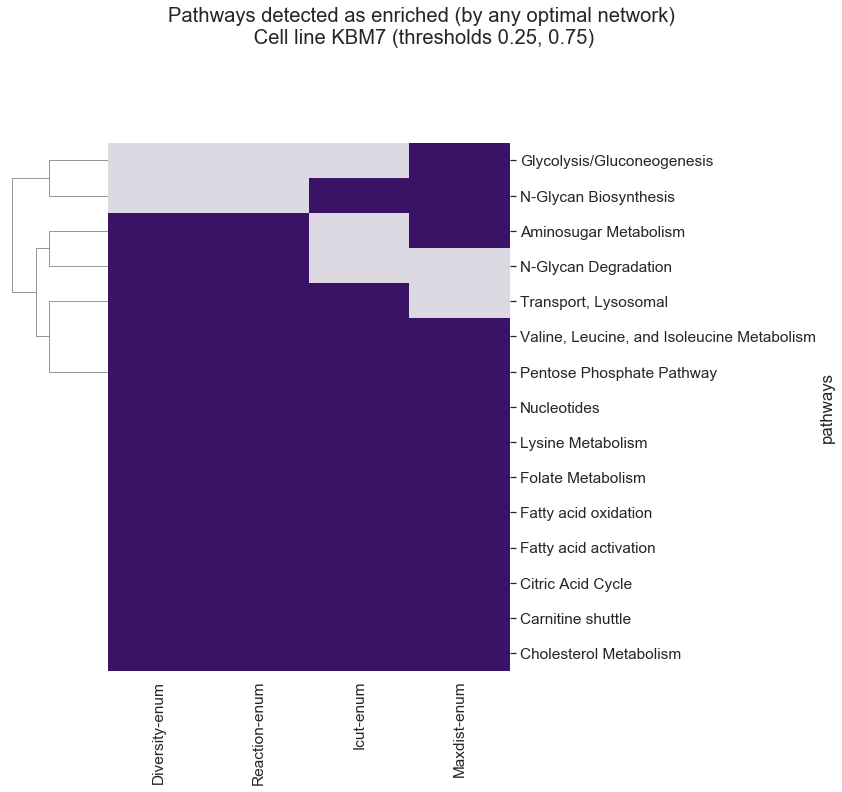

In [13]:
plot_heatmap_enrichment(cell="KBM7", threshold=[25, 75])

./results/cancer/csv/enrichment/K562_10_90_proportion_enriched.csv.zip


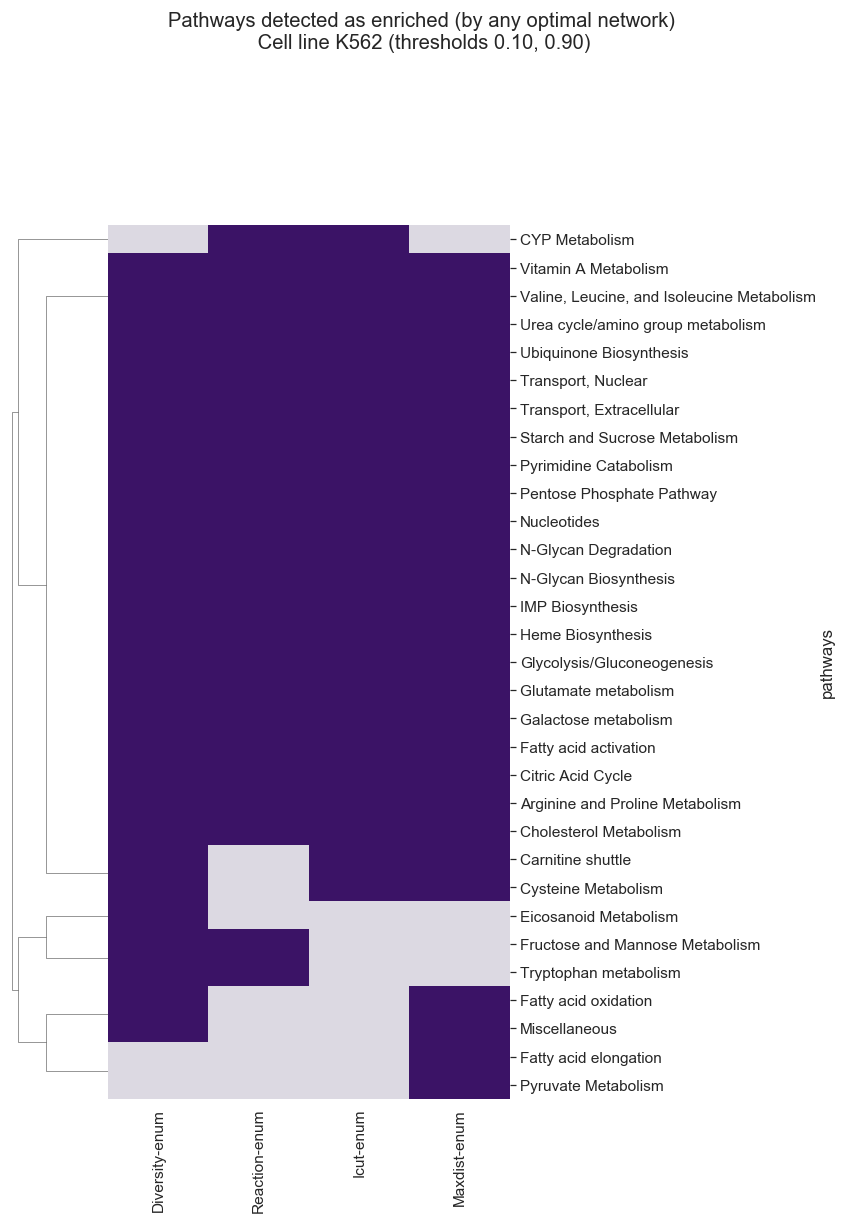

In [14]:
plot_heatmap_enrichment(cell="K562", threshold=[10, 90], figsize=(12,16))

./results/cancer/csv/enrichment/K562_25_75_proportion_enriched.csv.zip


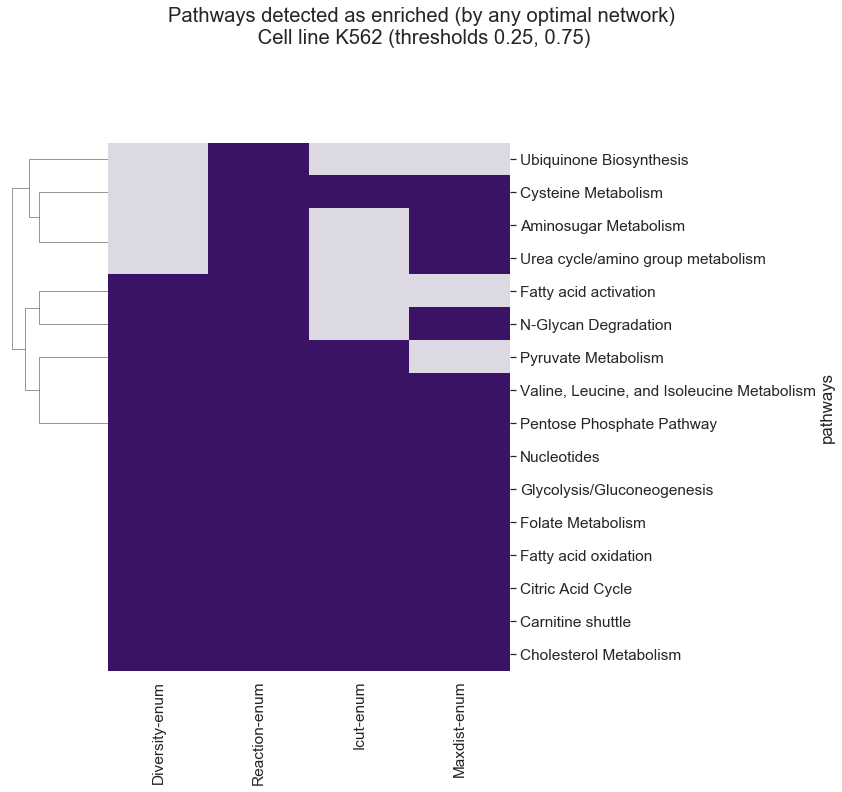

In [15]:
plot_heatmap_enrichment(cell="K562", threshold=[25, 75])